In [1]:
#utf-8
""" # funcTxtAnlytcs.py

This library contains multiple functions performing followins:
- Removing Stop wordts from a text
- Removing tags, signs and all non-alphanumeric
- Makes a dictionary of a list of words and returns the frequency
- Parses a PDF into list
- Gets the IP number and downloads the abstract from Google and translates it into English
-
"""

import numpy as np
import pandas as pd
import matplotlib as plt
from wordcloud import WordCloud
codec = 'utf-8'

stopwords = ['The', 'a', 'about', 'above', 'across', 'after', 'afterwards',
             'again', 'against', 'all', 'almost', 'alone', 'along',
             'already', 'also', 'although', 'always', 'am', 'among',
             'amongst', 'amoungst', 'amount', 'an', 'and', 'another',
             'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere',
             'are', 'around', 'as', 'at', 'back', 'be', 'became',
             'because', 'become', 'becomes', 'becoming', 'been',
             'before', 'beforehand', 'behind', 'being', 'below',
             'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant',
             'co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'done', 'down', 'due',
             'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else',
             'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever',
             'every', 'everyone', 'everything', 'everywhere', 'except',
             'few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first',
             'five', 'for', 'former', 'formerly', 'forty', 'found',
             'four', 'from', 'front', 'full', 'further', 'get', 'give',
             'go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her',
             'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers',
             'herself', 'him', 'himself', 'his', 'how', 'however',
             'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'keep',
             'last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made',
             'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine',
             'more', 'moreover', 'most', 'mostly', 'move', 'much',
             'must', 'my', 'myself', 'name', 'namely', 'neither', 'never',
             'nevertheless', 'next', 'nine', 'no', 'nobody', 'none',
             'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of',
             'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or',
             'other', 'others', 'otherwise', 'our', 'ours', 'ourselves',
             'out', 'over', 'own', 'part', 'per', 'perhaps', 'please',
             'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed',
             'seeming', 'seems', 'serious', 'several', 'she', 'should',
             'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so',
             'some', 'somehow', 'someone', 'something', 'sometime',
             'sometimes', 'somewhere', 'still', 'such', 'system', 'take',
             'ten', 'than', 'that', 'the', 'their', 'them', 'themselves',
             'then', 'thence', 'there', 'thereafter', 'thereby',
             'therefore', 'therein', 'thereupon', 'these', 'they',
             'thick', 'thin', 'third', 'this', 'those', 'though', 'three',
             'three', 'through', 'throughout', 'thru', 'thus', 'to',
             'together', 'too', 'top', 'toward', 'towards', 'twelve',
             'twenty', 'two', 'un', 'under', 'until', 'up', 'upon',
             'us', 'very', 'via', 'was', 'we', 'well', 'were', 'what',
             'whatever', 'when', 'whence', 'whenever', 'where',
             'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon',
             'wherever', 'whether', 'which', 'while', 'whither', 'who',
             'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with',
             'within', 'without', 'would', 'yet', 'you', 'your', 'thereof',
             'yours', 'yourself', 'yourselves','according', 'therefor', '<-', '/,,',
             '->', '),', '(−)', '©', '|', '/.,', '/.', '.-', '-,', ').',
             '//','(',')',';',':','[',']',',','™','/','.', 'method', 'device',
             'apparatus', 'used', 'using', 'based', 'use', 'tested', 'observed',
             'experiment', 'shown', 'various', 'abstract', 'nan', 'Nan', 'NaN',
             'pubchem cid', 'pubchem', 'cid', 'ga', 'water', 'air', '&',
             'preparing', 'preparation', 'title', '.', 'jp', 'æ',
             'ø', 'å', "\ " ," \ " , '', '', '', '', '', '', '', '', '', '',
             '', '', '', '', '', '', '', '', '', '', '', '', '',]




def rec_ave(n, xold, x, x10):
    return xold + 1 / n * (x - x10)


def is_nan(x):
    return (x is np.nan or x != x)


def mov_ave(a, n=30):
    mlt_mov_ave = a[0:n]
    x_old = sum(mlt_mov_ave) / n
    for i in range(n, len(a)):
        x_new = rec_ave(n, x_old, a[i], a[i - n])
        mlt_mov_ave.append(x_new)
        x_old = x_new

    return mlt_mov_ave

def stripTags(pageContents):
    pageContents = str(pageContents)
    startLoc = pageContents.find("<p>")
    endLoc = pageContents.rfind("<br/>")
    pageContents = pageContents[startLoc:endLoc]

    inside = 0
    text = ''

    for char in pageContents:
        if char == '<':
            inside = 1
        elif (inside == 1 and char == '>'):
            inside = 0
        elif inside == 1:
            continue
        else:
            text += char

    return text


def printtext(text):
    return text


# Given a text string, remove all non-alphanumeric
# characters (using Unicode definition of alphanumeric).


def stripNonAlphaNum(text):
    import re
    return re.compile(r'\W+', re.UNICODE).split(text)


# Given a list of words, return a dictionary of
# word-frequency pairs.


def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(list(zip(wordlist, wordfreq)))


def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux


def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]


import sys
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.converter import XMLConverter, HTMLConverter, TextConverter
from pdfminer.layout import LAParams
import io


def pdfparser(data):
    """ Parses a PDF into list """

    fp = open(data, 'rb')
    rsrcmgr = PDFResourceManager()
    retstr = io.StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    # Create a PDF interpreter object.
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    # Process each page contained in the document.

    for page in PDFPage.get_pages(fp):
        interpreter.process_page(page)
        data =  retstr.getvalue()

    return data


def pdfTextCount(filename):

    import funcTxtAnlytcs as ff
    from funcTxtAnlytcs import pdfparser
    text = pdfparser(filename)
    """  To get rid of integers   """
    # text = ''.join([i for i in text if not i.isdigit() or (i=='2' and text[-1]=='O') ])
    text = ''.join([i for i in text if not i.isdigit()])
    tokens = text.split()
    punctuations = ['(', ')', ';', ':', '[', ']', ',', '™', '/', '.']
    keywords = [word for word in tokens if not word in ff.stopwords and not word in punctuations]
    dictionary = ff.wordListToFreqDict(keywords)
    sorteddict = ff.sortFreqDict(dictionary)
    for s in sorteddict:
        # if s[0] >= 3:
        print(str(s))

def abstrctExtrct(patent_1):
    """- Gets the IP number and gets the abstract from Google and translates it into English"""

    from google_patent_scraper import scraper_class
    from googletrans import Translator
    import json
    # ~ Initialize scraper class ~ #
    patent_1 = patent_1.strip()
    patent_1 = patent_1.replace(" ", "")
    try:
        scraper=scraper_class()

        # ~ Add patents to list ~ #
        scraper.add_patents(patent_1)

        # ~ Scrape all patents ~ #
        scraper.scrape_all_patents()

        # ~ Get results of scrape ~ #
        patent_1_parsed = scraper.parsed_patents[patent_1]

        translator = Translator()
        return translator.translate(patent_1_parsed['abstract_text']).text
    except:
        return " "

def addAbstract(df):
    """ THIS EXTRACTS THE ABSTRACT FROM GOOGLE BY RECEIVING PUBLICATION NUMBER"""
    print(df["Publication Number"])
    abstract = [abstrctExtrct(num) for num in df["Publication Number"].tolist()]
    df = df.assign(abstract=abstract)
    return df


IPC_codes = pd.read_csv(r'IPC_table.xlsx').drop(columns=['Unnamed: 0'], axis=1)
def add_IPC_description(df, N):
    columnIPC = pd.DataFrame(df["IPCR Classifications"])
    columnIPC = columnIPC["IPCR Classifications"].str.split(';;', expand=True).add_prefix('code_')

    for i in columnIPC.columns:
        columnIPC[i] = columnIPC[i].astype(str).str[:N]
    for i in columnIPC.index:
        columnIPC.loc[i,:] = columnIPC.loc[i,:].drop_duplicates(keep='first')

    s = IPC_codes.set_index('code')['description']
    columnIPC = columnIPC.replace(s)
    columnIPC = columnIPC.fillna(value='')
    columnIPC['IPC Description'] = columnIPC[columnIPC.columns[0:]].apply(
        lambda x: ';'.join(x.dropna().astype(str)),
        axis=1
    )

    df['IPC Description'] = columnIPC['IPC Description']
    print('Descriptions added!')

    return df

def stringWord(df, colName):
    comment_words = ''
    for val in df[colName]:
        # split the value
        tokens = val.split()
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        comment_words += " ".join(tokens) + " "
    return comment_words

def searchedDF():
    for val in df[colName]:
        # typecaste each val to string
        val = str(val)
        if searchWord in val.lower():
            dfsearch = dfsearch.append(df.loc[df[colName] == val])
    return dfsearch




    

In [12]:
# Python program to generate WordCloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import funcTxtAnlytcs as ff
# from funcTxtAnlytcs import abstrctExtrct, add_IPC_description,wordCloud, addAbstract
""" SELECT FILE :::  """
"""----------------------------------------------"""
""" Can only take lower case """
fileName = r"MineBeaSteppingMotor.csv"

"""----------------------------------------------"""
""" SELECT COLUMN TO SEARCH :::  """
"""----------------------------------------------"""
""" The column to read from """
colName = "Title"
# colName = "Abstract"
# colName = "Keywords"
"""----------------------------------------------"""
""" SELECT SEARCH WORD :::   %LOWER CASE ONLY % """
""" Can only take lower case """
"""----------------------------------------------"""

searchOutpt = []
valList = []

comment_words = ''
stopwords = set(STOPWORDS)
lt = []

""" TO PRINT FULL DATAFRAME   """
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# pd.options.display.max_colwidth = 100

print('fileName   : ',fileName)

""" Iterate through the csv file  """
df = pd.read_csv("Data/Raw Data/"  + fileName , encoding="latin-1")
""" Empty dataframe for search"""
addAbstract(df)
add_IPC_description(df,4)



# # plot the WordCloud image


print(df.columns)




plt.show()


fileName   :  MineBeaSteppingMotor.csv
0         US 10530283 B2
1     US 2018/0287532 A1
2          US 9473056 B2
3     US 2016/0301343 A1
4          US 9787234 B2
5         US 10469010 B2
6     US 2018/0262136 A1
7     US 2019/0190415 A1
8         US 10790768 B2
9          US 9571021 B2
10    US 2019/0190417 A1
11        US 10615725 B2
12         US 9318933 B2
13         US 9647584 B2
14    US 2016/0126870 A1
15         US 9584049 B2
16    US 2020/0083827 A1
17    US 2018/0342926 A1
18         US 9595855 B2
19    US 2019/0181785 A1
20        US 10523145 B2
21    US 2018/0294754 A1
22         US 9257928 B2
23    US 2019/0157999 A1
24    US 2019/0157998 A1
25        US 10742146 B2
26        US 10742147 B2
27         US 9263922 B2
28         US 9461518 B2
29         US 9985510 B2
30        US 10498270 B2
31    US 2020/0014279 A1
Name: Publication Number, dtype: object
https://patents.google.com/patent/US10530283B2
https://patents.google.com/patent/US2018/0287532A1
https://patents.google.

Descriptions added!


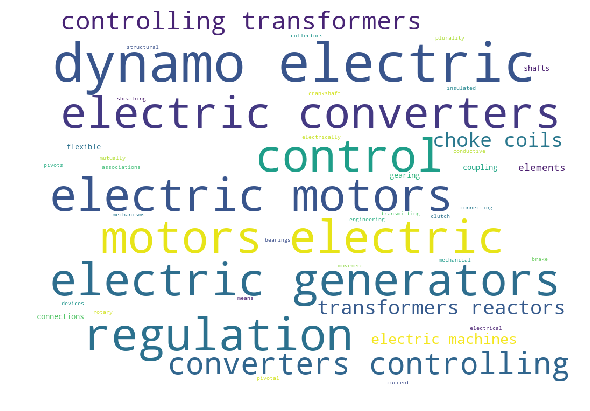

In [23]:
add_IPC_description(df,4)
df['IPC Description']
colName = 'IPC Description'
string = stringWord(df, colName)
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=1000, height=700, background_color='white', stopwords=stopwords,
                          prefer_horizontal=1, min_font_size=10).generate(string)
plt.figure('General wordcloud', figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

fileName   :  MineBeaSteppingMotor.csv
0         US 10530283 B2
1     US 2018/0287532 A1
2          US 9473056 B2
3     US 2016/0301343 A1
4          US 9787234 B2
5         US 10469010 B2
6     US 2018/0262136 A1
7     US 2019/0190415 A1
8         US 10790768 B2
9          US 9571021 B2
10    US 2019/0190417 A1
11        US 10615725 B2
12         US 9318933 B2
13         US 9647584 B2
14    US 2016/0126870 A1
15         US 9584049 B2
16    US 2020/0083827 A1
17    US 2018/0342926 A1
18         US 9595855 B2
19    US 2019/0181785 A1
20        US 10523145 B2
21    US 2018/0294754 A1
22         US 9257928 B2
23    US 2019/0157999 A1
24    US 2019/0157998 A1
25        US 10742146 B2
26        US 10742147 B2
27         US 9263922 B2
28         US 9461518 B2
29         US 9985510 B2
30        US 10498270 B2
31    US 2020/0014279 A1
Name: Publication Number, dtype: object
https://patents.google.com/patent/US10530283B2
https://patents.google.com/patent/US2018/0287532A1
https://patents.google.

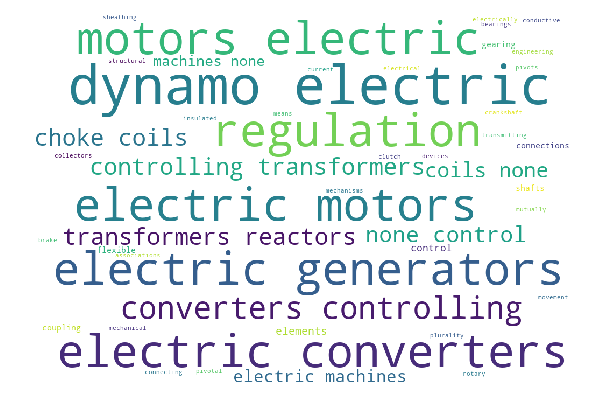

In [24]:
# utf-8
""" # funcTxtAnlytcs.py

This library contains multiple functions performing followins:
- Removing Stop wordts from a text
- Removing tags, signs and all non-alphanumeric
- Makes a dictionary of a list of words and returns the frequency
- Parses a PDF into list
- Gets the IP number and downloads the abstract from Google and translates it into English
-
"""

import numpy as np
import pandas as pd
import matplotlib as plt
from wordcloud import WordCloud

codec = 'utf-8'

stopwords = ['The', 'a', 'about', 'above', 'across', 'after', 'afterwards',
             'again', 'against', 'all', 'almost', 'alone', 'along',
             'already', 'also', 'although', 'always', 'am', 'among',
             'amongst', 'amoungst', 'amount', 'an', 'and', 'another',
             'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere',
             'are', 'around', 'as', 'at', 'back', 'be', 'became',
             'because', 'become', 'becomes', 'becoming', 'been',
             'before', 'beforehand', 'behind', 'being', 'below',
             'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant',
             'co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'done', 'down', 'due',
             'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else',
             'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever',
             'every', 'everyone', 'everything', 'everywhere', 'except',
             'few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first',
             'five', 'for', 'former', 'formerly', 'forty', 'found',
             'four', 'from', 'front', 'full', 'further', 'get', 'give',
             'go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her',
             'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers',
             'herself', 'him', 'himself', 'his', 'how', 'however',
             'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'keep',
             'last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made',
             'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine',
             'more', 'moreover', 'most', 'mostly', 'move', 'much',
             'must', 'my', 'myself', 'name', 'namely', 'neither', 'never',
             'nevertheless', 'next', 'nine', 'no', 'nobody', 'none',
             'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of',
             'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or',
             'other', 'others', 'otherwise', 'our', 'ours', 'ourselves',
             'out', 'over', 'own', 'part', 'per', 'perhaps', 'please',
             'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed',
             'seeming', 'seems', 'serious', 'several', 'she', 'should',
             'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so',
             'some', 'somehow', 'someone', 'something', 'sometime',
             'sometimes', 'somewhere', 'still', 'such', 'system', 'take',
             'ten', 'than', 'that', 'the', 'their', 'them', 'themselves',
             'then', 'thence', 'there', 'thereafter', 'thereby',
             'therefore', 'therein', 'thereupon', 'these', 'they',
             'thick', 'thin', 'third', 'this', 'those', 'though', 'three',
             'three', 'through', 'throughout', 'thru', 'thus', 'to',
             'together', 'too', 'top', 'toward', 'towards', 'twelve',
             'twenty', 'two', 'un', 'under', 'until', 'up', 'upon',
             'us', 'very', 'via', 'was', 'we', 'well', 'were', 'what',
             'whatever', 'when', 'whence', 'whenever', 'where',
             'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon',
             'wherever', 'whether', 'which', 'while', 'whither', 'who',
             'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with',
             'within', 'without', 'would', 'yet', 'you', 'your', 'thereof',
             'yours', 'yourself', 'yourselves', 'according', 'therefor', '<-', '/,,',
             '->', '),', '(−)', '©', '|', '/.,', '/.', '.-', '-,', ').',
             '//', '(', ')', ';', ':', '[', ']', ',', '™', '/', '.', 'method', 'device',
             'apparatus', 'used', 'using', 'based', 'use', 'tested', 'observed',
             'experiment', 'shown', 'various', 'abstract', 'nan', 'Nan', 'NaN',
             'pubchem cid', 'pubchem', 'cid', 'ga', 'water', 'air', '&',
             'preparing', 'preparation', 'title', '.', 'jp', 'æ',
             'ø', 'å', "\ ", " \ ", '', '', '', '', '', '', '', '', '', '',
             '', '', '', '', '', '', '', '', '', '', '', '', '', ]


def rec_ave(n, xold, x, x10):
    return xold + 1 / n * (x - x10)


def is_nan(x):
    return (x is np.nan or x != x)


def mov_ave(a, n=30):
    mlt_mov_ave = a[0:n]
    x_old = sum(mlt_mov_ave) / n
    for i in range(n, len(a)):
        x_new = rec_ave(n, x_old, a[i], a[i - n])
        mlt_mov_ave.append(x_new)
        x_old = x_new

    return mlt_mov_ave


def stripTags(pageContents):
    pageContents = str(pageContents)
    startLoc = pageContents.find("<p>")
    endLoc = pageContents.rfind("<br/>")
    pageContents = pageContents[startLoc:endLoc]

    inside = 0
    text = ''

    for char in pageContents:
        if char == '<':
            inside = 1
        elif (inside == 1 and char == '>'):
            inside = 0
        elif inside == 1:
            continue
        else:
            text += char

    return text


def printtext(text):
    return text


# Given a text string, remove all non-alphanumeric
# characters (using Unicode definition of alphanumeric).


def stripNonAlphaNum(text):
    import re
    return re.compile(r'\W+', re.UNICODE).split(text)


# Given a list of words, return a dictionary of
# word-frequency pairs.


def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(list(zip(wordlist, wordfreq)))


def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux


def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]


import sys
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.converter import XMLConverter, HTMLConverter, TextConverter
from pdfminer.layout import LAParams
import io


def pdfparser(data):
    """ Parses a PDF into list """

    fp = open(data, 'rb')
    rsrcmgr = PDFResourceManager()
    retstr = io.StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    # Create a PDF interpreter object.
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    # Process each page contained in the document.

    for page in PDFPage.get_pages(fp):
        interpreter.process_page(page)
        data = retstr.getvalue()

    return data


def pdfTextCount(filename):
    import funcTxtAnlytcs as ff
    from funcTxtAnlytcs import pdfparser
    text = pdfparser(filename)
    """  To get rid of integers   """
    # text = ''.join([i for i in text if not i.isdigit() or (i=='2' and text[-1]=='O') ])
    text = ''.join([i for i in text if not i.isdigit()])
    tokens = text.split()
    punctuations = ['(', ')', ';', ':', '[', ']', ',', '™', '/', '.']
    keywords = [word for word in tokens if not word in ff.stopwords and not word in punctuations]
    dictionary = ff.wordListToFreqDict(keywords)
    sorteddict = ff.sortFreqDict(dictionary)
    for s in sorteddict:
        # if s[0] >= 3:
        print(str(s))


def abstrctExtrct(patent_1):
    """- Gets the IP number and gets the abstract from Google and translates it into English"""

    from google_patent_scraper import scraper_class
    from googletrans import Translator
    import json
    # ~ Initialize scraper class ~ #
    patent_1 = patent_1.strip()
    patent_1 = patent_1.replace(" ", "")
    try:
        scraper = scraper_class()

        # ~ Add patents to list ~ #
        scraper.add_patents(patent_1)

        # ~ Scrape all patents ~ #
        scraper.scrape_all_patents()

        # ~ Get results of scrape ~ #
        patent_1_parsed = scraper.parsed_patents[patent_1]

        translator = Translator()
        return translator.translate(patent_1_parsed['abstract_text']).text
    except:
        return " "


def addAbstract(df):
    """ THIS EXTRACTS THE ABSTRACT FROM GOOGLE BY RECEIVING PUBLICATION NUMBER"""
    print(df["Publication Number"])
    abstract = [abstrctExtrct(num) for num in df["Publication Number"].tolist()]
    # df.assign(abstract=abstract, inplace=True)
    df['Abstract'] = abstract
    return df


IPC_codes = pd.read_csv(r'IPC_table.xlsx').drop(columns=['Unnamed: 0'], axis=1)


def add_IPC_description(df, N):
    columnIPC = pd.DataFrame(df["IPCR Classifications"])
    columnIPC = columnIPC["IPCR Classifications"].str.split(';;', expand=True).add_prefix('code_')

    for i in columnIPC.columns:
        columnIPC[i] = columnIPC[i].astype(str).str[:N]
    for i in columnIPC.index:
        columnIPC.loc[i, :] = columnIPC.loc[i, :].drop_duplicates(keep='first')

    s = IPC_codes.set_index('code')['description']
    columnIPC = columnIPC.replace(s)
    columnIPC = columnIPC.fillna(value='')
    columnIPC['IPC Description'] = columnIPC[columnIPC.columns[0:]].apply(
        lambda x: ';'.join(x.dropna().astype(str)),
        axis=1
    )

    df['IPC Description'] = columnIPC['IPC Description']
    print('Descriptions added!')

    return df


def stringWord(df, colName):
    comment_words = ''
    for val in df[colName]:
        # split the value
        tokens = val.split()
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        comment_words += " ".join(tokens) + " "
    return comment_words


def searchedDF(df, searchWord):
    dfsearch = pd.DataFrame(columns=df.columns)
    for val in df[colName]:
        # typecaste each val to string
        val = str(val)
        if searchWord in val.lower():
            dfsearch = dfsearch.append(df.loc[df[colName] == val])
    return dfsearch



# Python program to generate WordCloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import funcTxtAnlytcs as ff
# from funcTxtAnlytcs import abstrctExtrct, add_IPC_description,wordCloud, addAbstract
""" SELECT FILE :::  """
"""----------------------------------------------"""
""" Can only take lower case """
fileName = r"MineBeaSteppingMotor.csv"

"""----------------------------------------------"""
""" SELECT COLUMN TO SEARCH :::  """
"""----------------------------------------------"""
""" The column to read from """
colName = "Title"
# colName = "Abstract"
# colName = "Keywords"
"""----------------------------------------------"""
""" SELECT SEARCH WORD :::   %LOWER CASE ONLY % """
""" Can only take lower case """
"""----------------------------------------------"""

searchOutpt = []
valList = []

comment_words = ''
stopwords = set(STOPWORDS)
lt = []

""" TO PRINT FULL DATAFRAME   """
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# pd.options.display.max_colwidth = 100

print('fileName   : ',fileName)

""" Iterate through the csv file  """
df = pd.read_csv("Data/Raw Data/"  + fileName , encoding="latin-1")

""" Empty dataframe for search"""
addAbstract(df)
add_IPC_description(df,4)
searchWord = "motor"
dfsearch = searchedDF(df,searchWord)
colName = 'IPC Description'
"""Creates an string from a column of a data frame"""
"""Used prior to wordcloud for preparing the string"""
string = stringWord(df, colName)
print(string)

"""WORD CLOUD DOES NOT WORK WITH PYCHARM AT THE MOMENT, I DONNO WHY :D, USE JUPYTER NOTEBOOK INSTEAD"""
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=1000, height=700, background_color='white', stopwords=stopwords,
                           prefer_horizontal=1, min_font_size=10).generate(string)
plt.figure('General wordcloud', figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


fileName   :  MineBeaSteppingMotor.csv
0         US 10530283 B2
1     US 2018/0287532 A1
2          US 9473056 B2
3     US 2016/0301343 A1
4          US 9787234 B2
5         US 10469010 B2
6     US 2018/0262136 A1
7     US 2019/0190415 A1
8         US 10790768 B2
9          US 9571021 B2
10    US 2019/0190417 A1
11        US 10615725 B2
12         US 9318933 B2
13         US 9647584 B2
14    US 2016/0126870 A1
15         US 9584049 B2
16    US 2020/0083827 A1
17    US 2018/0342926 A1
18         US 9595855 B2
19    US 2019/0181785 A1
20        US 10523145 B2
21    US 2018/0294754 A1
22         US 9257928 B2
23    US 2019/0157999 A1
24    US 2019/0157998 A1
25        US 10742146 B2
26        US 10742147 B2
27         US 9263922 B2
28         US 9461518 B2
29         US 9985510 B2
30        US 10498270 B2
31    US 2020/0014279 A1
Name: Publication Number, dtype: object
https://patents.google.com/patent/US10530283B2
https://patents.google.com/patent/US2018/0287532A1
https://patents.google.

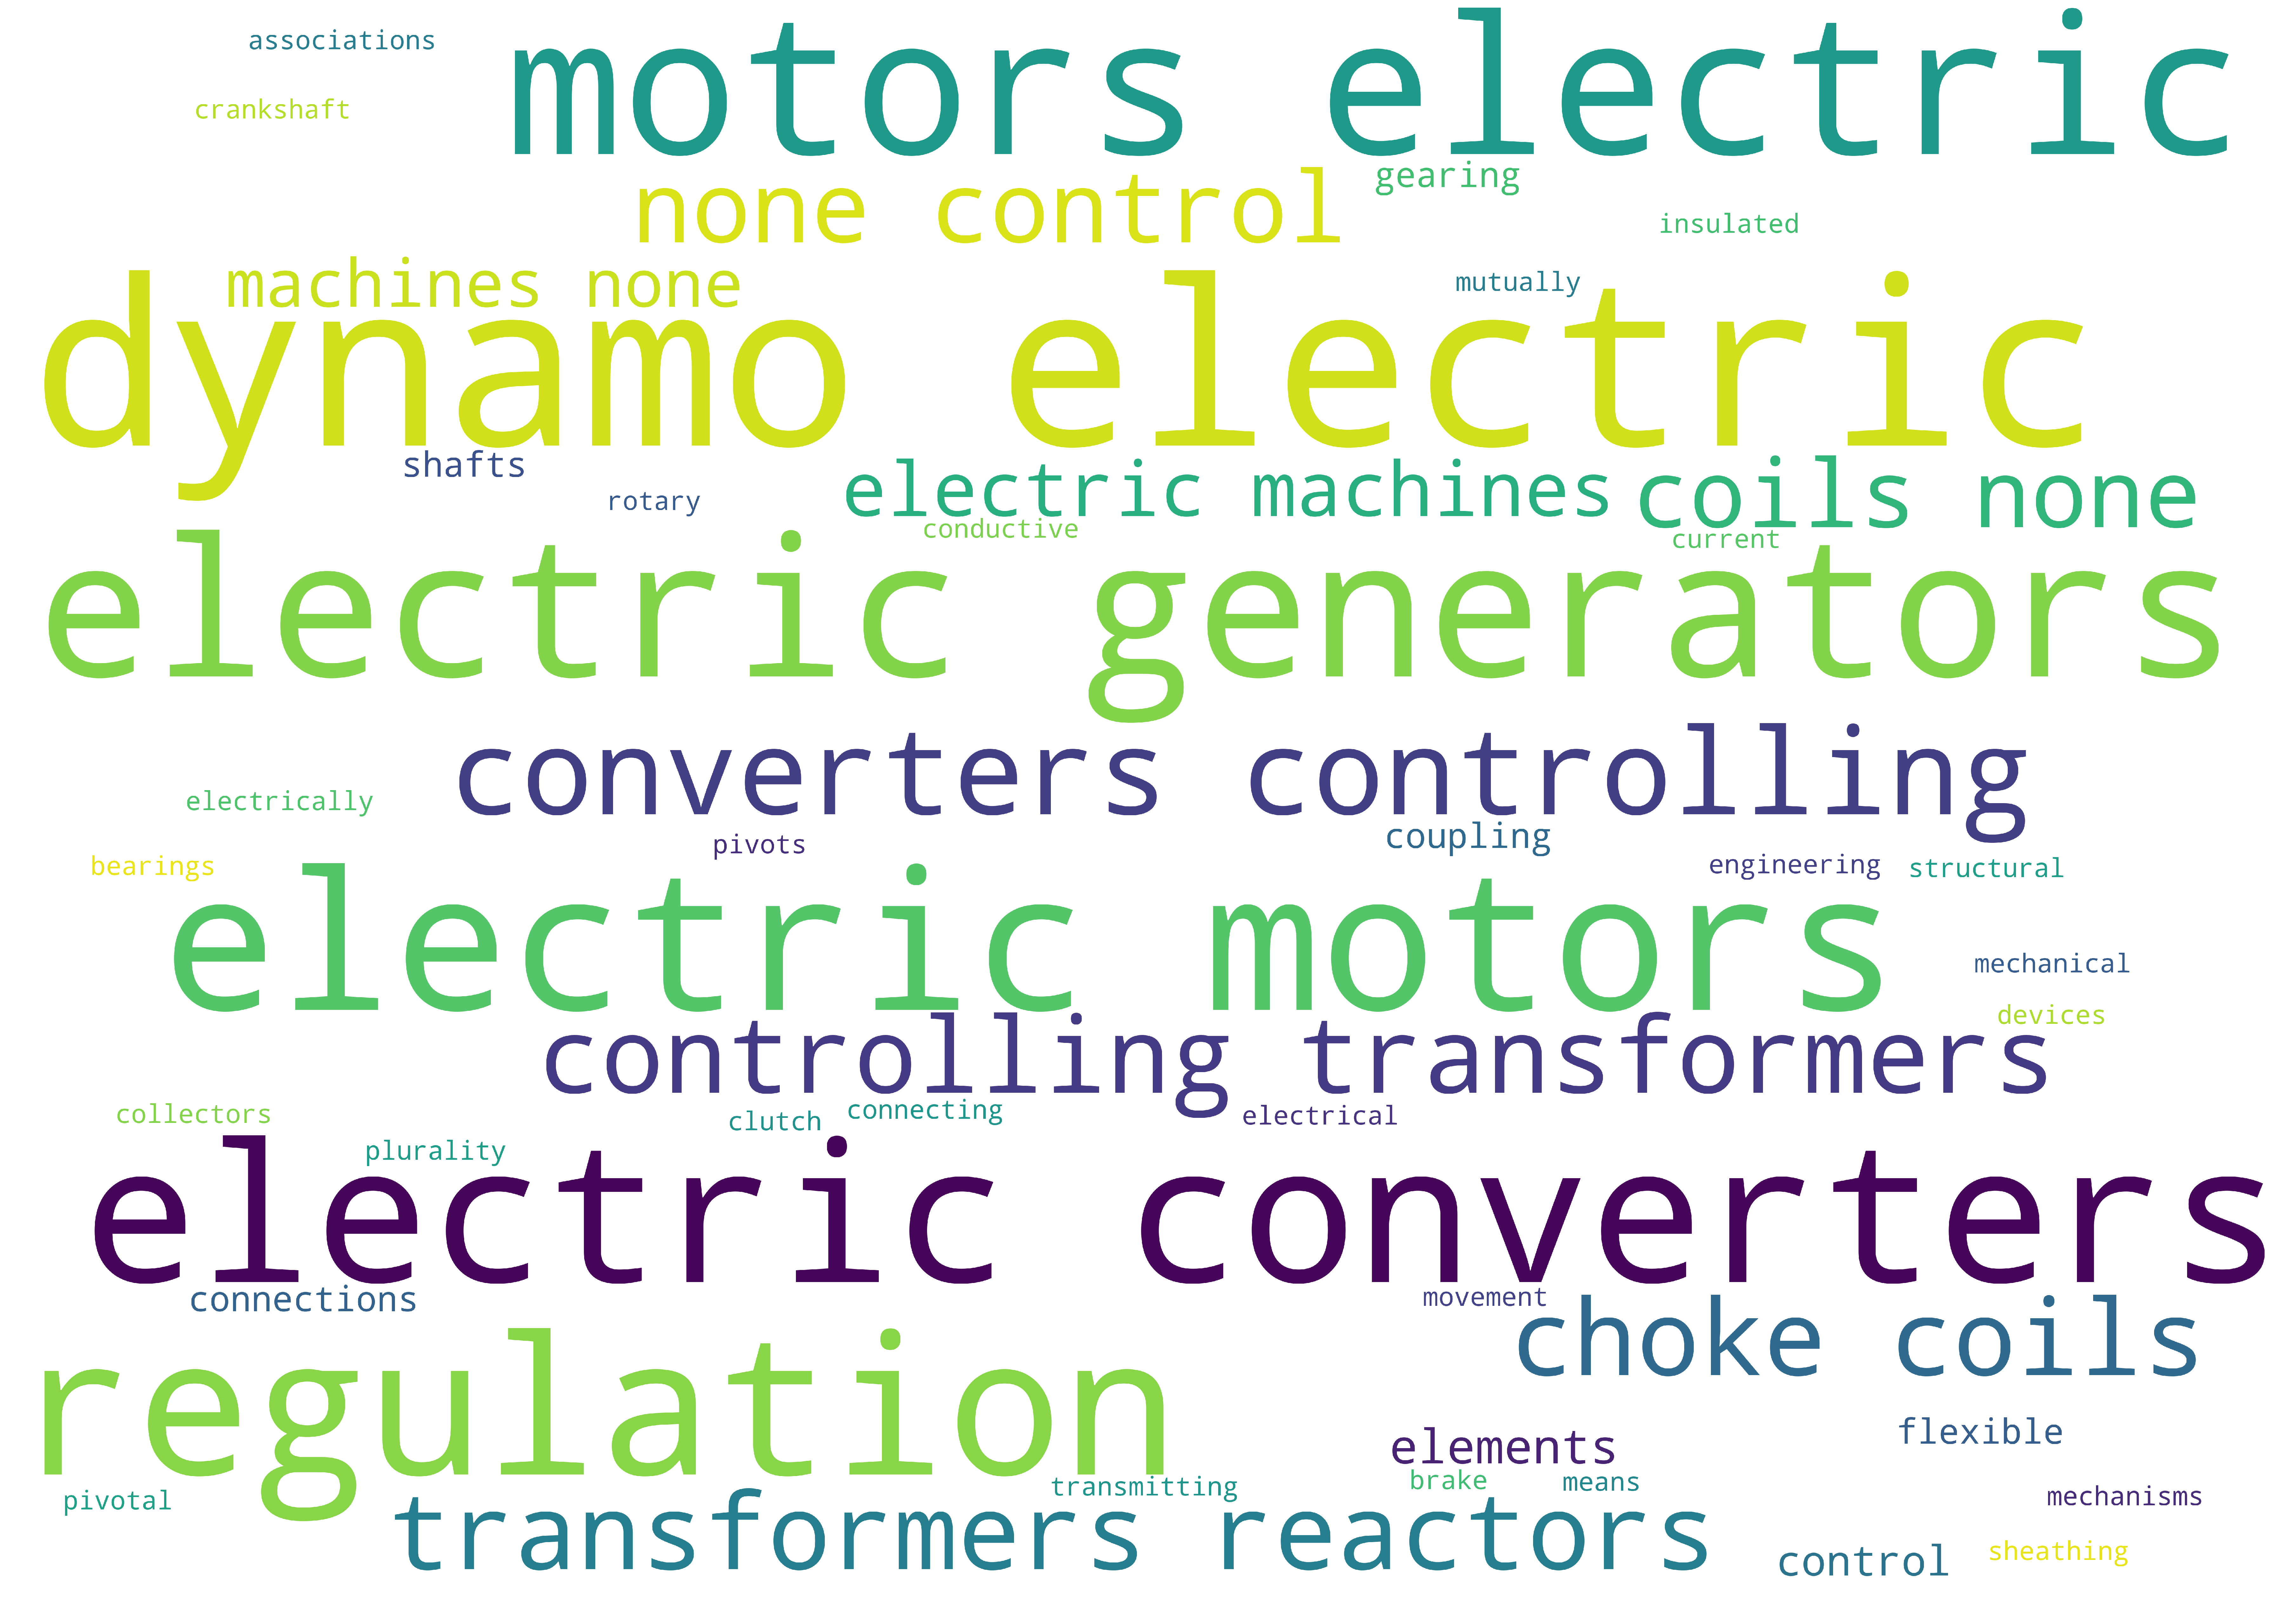

'$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! END OF "TO BE COMMENTED LATER" !!!! $$$$$$$$$$$$$$$$$$$$$$$$$'

In [28]:
# utf-8
""" # funcTxtAnlytcs.py

This library contains multiple functions performing followins:
- Removing Stop wordts from a text
- Removing tags, signs and all non-alphanumeric
- Makes a dictionary of a list of words and returns the frequency
- Parses a PDF into list
- Gets the IP number and downloads the abstract from Google and translates it into English
-
"""

import numpy as np
import pandas as pd

codec = 'utf-8'

stopwords = ['The', 'a', 'about', 'above', 'across', 'after', 'afterwards',
             'again', 'against', 'all', 'almost', 'alone', 'along',
             'already', 'also', 'although', 'always', 'am', 'among',
             'amongst', 'amoungst', 'amount', 'an', 'and', 'another',
             'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere',
             'are', 'around', 'as', 'at', 'back', 'be', 'became',
             'because', 'become', 'becomes', 'becoming', 'been',
             'before', 'beforehand', 'behind', 'being', 'below',
             'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant',
             'co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'done', 'down', 'due',
             'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else',
             'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever',
             'every', 'everyone', 'everything', 'everywhere', 'except',
             'few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first',
             'five', 'for', 'former', 'formerly', 'forty', 'found',
             'four', 'from', 'front', 'full', 'further', 'get', 'give',
             'go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her',
             'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers',
             'herself', 'him', 'himself', 'his', 'how', 'however',
             'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'keep',
             'last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made',
             'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine',
             'more', 'moreover', 'most', 'mostly', 'move', 'much',
             'must', 'my', 'myself', 'name', 'namely', 'neither', 'never',
             'nevertheless', 'next', 'nine', 'no', 'nobody', 'none',
             'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of',
             'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or',
             'other', 'others', 'otherwise', 'our', 'ours', 'ourselves',
             'out', 'over', 'own', 'part', 'per', 'perhaps', 'please',
             'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed',
             'seeming', 'seems', 'serious', 'several', 'she', 'should',
             'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so',
             'some', 'somehow', 'someone', 'something', 'sometime',
             'sometimes', 'somewhere', 'still', 'such', 'system', 'take',
             'ten', 'than', 'that', 'the', 'their', 'them', 'themselves',
             'then', 'thence', 'there', 'thereafter', 'thereby',
             'therefore', 'therein', 'thereupon', 'these', 'they',
             'thick', 'thin', 'third', 'this', 'those', 'though', 'three',
             'three', 'through', 'throughout', 'thru', 'thus', 'to',
             'together', 'too', 'top', 'toward', 'towards', 'twelve',
             'twenty', 'two', 'un', 'under', 'until', 'up', 'upon',
             'us', 'very', 'via', 'was', 'we', 'well', 'were', 'what',
             'whatever', 'when', 'whence', 'whenever', 'where',
             'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon',
             'wherever', 'whether', 'which', 'while', 'whither', 'who',
             'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with',
             'within', 'without', 'would', 'yet', 'you', 'your', 'thereof',
             'yours', 'yourself', 'yourselves', 'according', 'therefor', '<-', '/,,',
             '->', '),', '(−)', '©', '|', '/.,', '/.', '.-', '-,', ').',
             '//', '(', ')', ';', ':', '[', ']', ',', '™', '/', '.', 'method', 'device',
             'apparatus', 'used', 'using', 'based', 'use', 'tested', 'observed',
             'experiment', 'shown', 'various', 'abstract', 'nan', 'Nan', 'NaN',
             'pubchem cid', 'pubchem', 'cid', 'ga', 'water', 'air', '&',
             'preparing', 'preparation', 'title', '.', 'jp', 'æ',
             'ø', 'å', "\ ", " \ ", '', '', '', '', '', '', '', '', '', '',
             '', '', '', '', '', '', '', '', '', '', '', '', '', ]


def rec_ave(n, xold, x, x10):
    return xold + 1 / n * (x - x10)


def is_nan(x):
    return (x is np.nan or x != x)


def mov_ave(a, n=30):
    mlt_mov_ave = a[0:n]
    x_old = sum(mlt_mov_ave) / n
    for i in range(n, len(a)):
        x_new = rec_ave(n, x_old, a[i], a[i - n])
        mlt_mov_ave.append(x_new)
        x_old = x_new

    return mlt_mov_ave


def stripTags(pageContents):
    pageContents = str(pageContents)
    startLoc = pageContents.find("<p>")
    endLoc = pageContents.rfind("<br/>")
    pageContents = pageContents[startLoc:endLoc]

    inside = 0
    text = ''

    for char in pageContents:
        if char == '<':
            inside = 1
        elif (inside == 1 and char == '>'):
            inside = 0
        elif inside == 1:
            continue
        else:
            text += char

    return text


def printtext(text):
    return text


# Given a text string, remove all non-alphanumeric
# characters (using Unicode definition of alphanumeric).


def stripNonAlphaNum(text):
    import re
    return re.compile(r'\W+', re.UNICODE).split(text)


# Given a list of words, return a dictionary of
# word-frequency pairs.


def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(list(zip(wordlist, wordfreq)))


def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux


def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]


from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
import io


def pdfparser(data):
    """ Parses a PDF into list """

    fp = open(data, 'rb')
    rsrcmgr = PDFResourceManager()
    retstr = io.StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    # Create a PDF interpreter object.
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    # Process each page contained in the document.

    for page in PDFPage.get_pages(fp):
        interpreter.process_page(page)
        data = retstr.getvalue()

    return data


def pdfTextCount(filename):
    from Archive import funcTxtAnlytcs as ff
    from Archive.funcTxtAnlytcs import pdfparser
    text = pdfparser(filename)
    """  To get rid of integers   """
    # text = ''.join([i for i in text if not i.isdigit() or (i=='2' and text[-1]=='O') ])
    text = ''.join([i for i in text if not i.isdigit()])
    tokens = text.split()
    punctuations = ['(', ')', ';', ':', '[', ']', ',', '™', '/', '.']
    keywords = [word for word in tokens if not word in ff.stopwords and not word in punctuations]
    dictionary = ff.wordListToFreqDict(keywords)
    sorteddict = ff.sortFreqDict(dictionary)
    for s in sorteddict:
        # if s[0] >= 3:
        print(str(s))


def abstrctExtrct(patent_1):
    """- Gets the IP number and gets the abstract from Google and translates it into English"""

    from google_patent_scraper import scraper_class
    from googletrans import Translator
    # ~ Initialize scraper class ~ #
    patent_1 = patent_1.strip()
    patent_1 = patent_1.replace(" ", "")
    try:
        scraper = scraper_class()

        # ~ Add patents to list ~ #
        scraper.add_patents(patent_1)

        # ~ Scrape all patents ~ #
        scraper.scrape_all_patents()

        # ~ Get results of scrape ~ #
        patent_1_parsed = scraper.parsed_patents[patent_1]

        translator = Translator()
        return translator.translate(patent_1_parsed['abstract_text']).text
    except:
        return " "


def addAbstract(df):
    """ THIS EXTRACTS THE ABSTRACT FROM GOOGLE BY RECEIVING PUBLICATION NUMBER"""
    print(df["Publication Number"])
    abstract = [abstrctExtrct(num) for num in df["Publication Number"].tolist()]
    # df.assign(abstract=abstract, inplace=True)
    df['Abstract'] = abstract
    return df


IPC_codes = pd.read_csv(r'IPC_table.xlsx').drop(columns=['Unnamed: 0'], axis=1)


def addIPCDescription(df, N):
    columnIPC = pd.DataFrame(df["IPCR Classifications"])
    columnIPC = columnIPC["IPCR Classifications"].str.split(';;', expand=True).add_prefix('code_')

    for i in columnIPC.columns:
        columnIPC[i] = columnIPC[i].astype(str).str[:N]
    for i in columnIPC.index:
        columnIPC.loc[i, :] = columnIPC.loc[i, :].drop_duplicates(keep='first')

    s = IPC_codes.set_index('code')['description']
    columnIPC = columnIPC.replace(s)
    columnIPC = columnIPC.fillna(value='')
    columnIPC['IPC Description'] = columnIPC[columnIPC.columns[0:]].apply(
        lambda x: ';'.join(x.dropna().astype(str)),
        axis=1
    )

    df['IPC Description'] = columnIPC['IPC Description']
    print('Descriptions added!')

    return df


def stringWord(df, colName):
    comment_words = ''
    for val in df[colName]:
        # split the value
        tokens = val.split()
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        comment_words += " ".join(tokens) + " "
    return comment_words


def searchedDF(df, searchWord):
    dfsearch = pd.DataFrame(columns=df.columns)
    for val in df[colName]:
        # typecaste each val to string
        val = str(val)
        if searchWord in val.lower():
            dfsearch = dfsearch.append(df.loc[df[colName] == val])
    return dfsearch


"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! START OF "TO BE COMMENTED LATER" !!!! $$$$$$$$$$$$$$$$$$$$$$$$$"""

"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! CAUTION !!!! $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"""
"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! CAUTION !!!! $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"""
"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! CAUTION !!!! $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"""

"""  TEST SCRIPT FOR FUNCTIONS  """
"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! CAUTION !!!! $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"""

# Python program to generate WordCloud

from wordcloud import STOPWORDS
import pandas as pd

# from funcTxtAnlytcs import abstrctExtrct, add_IPC_description,wordCloud, addAbstract
""" SELECT FILE :::  """
"""----------------------------------------------"""
""" Can only take lower case """
fileName = r"MineBeaSteppingMotor.csv"

"""----------------------------------------------"""
""" SELECT COLUMN TO SEARCH :::  """
"""----------------------------------------------"""
""" The column to read from """
colName = "Title"
# colName = "Abstract"
# colName = "Keywords"
"""----------------------------------------------"""
""" SELECT SEARCH WORD :::   %LOWER CASE ONLY % """
""" Can only take lower case """
"""----------------------------------------------"""

searchOutpt = []
valList = []

comment_words = ''
stopwords = set(STOPWORDS)
lt = []

""" TO PRINT FULL DATAFRAME   """
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# pd.options.display.max_colwidth = 100

print('fileName   : ',fileName)

""" Iterate through the csv file  """
df = pd.read_csv("Data/Raw Data/"  + fileName , encoding="latin-1")

""" Empty dataframe for search"""
addAbstract(df)
addIPCDescription(df, 4)
searchWord = "motor"
dfsearch = searchedDF(df,searchWord)
print(dfsearch.head(5))
colName = 'IPC Description'
"""Creates an string from a column of a data frame"""
"""Used prior to wordcloud for preparing the string"""
string = stringWord(df, colName)
print(string)
"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! CAUTION !!!! $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"""
"""WORD CLOUD DOES NOT WORK WITH PYCHARM AT THE MOMENT, I DONNO WHY :D, USE JUPYTER NOTEBOOK INSTEAD"""
wordcloud = WordCloud(width=10000, height=7000, background_color='white', stopwords=stopwords,
                           prefer_horizontal=1, min_font_size=10).generate(string)
plt.figure('General wordcloud', figsize=(100, 70), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! CAUTION !!!! $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"""
"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! CAUTION !!!! $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"""
"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! CAUTION !!!! $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"""

"""  END OF TEST SCRIPT FOR FUNCTIONS  """
"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! END OF "TO BE COMMENTED LATER" !!!! $$$$$$$$$$$$$$$$$$$$$$$$$"""


fileName   :  MineBeaSteppingMotor.csv
0         US 10530283 B2
1     US 2018/0287532 A1
2          US 9473056 B2
3     US 2016/0301343 A1
4          US 9787234 B2
5         US 10469010 B2
6     US 2018/0262136 A1
7     US 2019/0190415 A1
8         US 10790768 B2
9          US 9571021 B2
10    US 2019/0190417 A1
11        US 10615725 B2
12         US 9318933 B2
13         US 9647584 B2
14    US 2016/0126870 A1
15         US 9584049 B2
16    US 2020/0083827 A1
17    US 2018/0342926 A1
18         US 9595855 B2
19    US 2019/0181785 A1
20        US 10523145 B2
21    US 2018/0294754 A1
22         US 9257928 B2
23    US 2019/0157999 A1
24    US 2019/0157998 A1
25        US 10742146 B2
26        US 10742147 B2
27         US 9263922 B2
28         US 9461518 B2
29         US 9985510 B2
30        US 10498270 B2
31    US 2020/0014279 A1
Name: Publication Number, dtype: object
https://patents.google.com/patent/US10530283B2
https://patents.google.com/patent/US2018/0287532A1
https://patents.google.

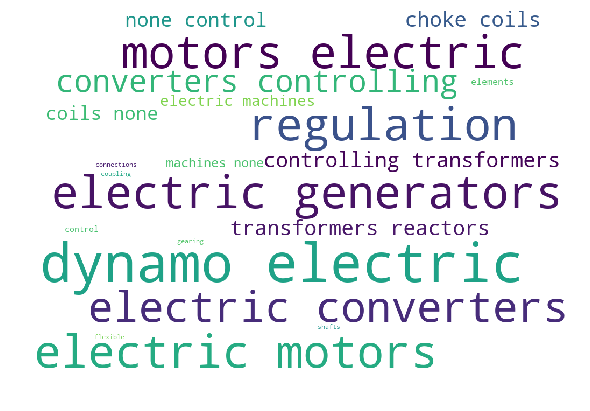

motor


'$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! END OF "TO BE COMMENTED LATER" !!!! $$$$$$$$$$$$$$$$$$$$$$$$$'

<Figure size 432x288 with 0 Axes>

In [6]:
# utf-8
""" # funcTxtAnlytcs.py

This library contains multiple functions performing followins:
- Removing Stop wordts from a text
- Removing tags, signs and all non-alphanumeric
- Makes a dictionary of a list of words and returns the frequency
- Parses a PDF into list
- Gets the IP number and downloads the abstract from Google and translates it into English
-
"""

import numpy as np
import pandas as pd

codec = 'utf-8'

stopwords = ['The', 'a', 'about', 'above', 'across', 'after', 'afterwards',
             'again', 'against', 'all', 'almost', 'alone', 'along',
             'already', 'also', 'although', 'always', 'am', 'among',
             'amongst', 'amoungst', 'amount', 'an', 'and', 'another',
             'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere',
             'are', 'around', 'as', 'at', 'back', 'be', 'became',
             'because', 'become', 'becomes', 'becoming', 'been',
             'before', 'beforehand', 'behind', 'being', 'below',
             'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant',
             'co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'done', 'down', 'due',
             'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else',
             'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever',
             'every', 'everyone', 'everything', 'everywhere', 'except',
             'few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first',
             'five', 'for', 'former', 'formerly', 'forty', 'found',
             'four', 'from', 'front', 'full', 'further', 'get', 'give',
             'go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her',
             'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers',
             'herself', 'him', 'himself', 'his', 'how', 'however',
             'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'keep',
             'last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made',
             'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine',
             'more', 'moreover', 'most', 'mostly', 'move', 'much',
             'must', 'my', 'myself', 'name', 'namely', 'neither', 'never',
             'nevertheless', 'next', 'nine', 'no', 'nobody', 'none',
             'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of',
             'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or',
             'other', 'others', 'otherwise', 'our', 'ours', 'ourselves',
             'out', 'over', 'own', 'part', 'per', 'perhaps', 'please',
             'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed',
             'seeming', 'seems', 'serious', 'several', 'she', 'should',
             'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so',
             'some', 'somehow', 'someone', 'something', 'sometime',
             'sometimes', 'somewhere', 'still', 'such', 'system', 'take',
             'ten', 'than', 'that', 'the', 'their', 'them', 'themselves',
             'then', 'thence', 'there', 'thereafter', 'thereby',
             'therefore', 'therein', 'thereupon', 'these', 'they',
             'thick', 'thin', 'third', 'this', 'those', 'though', 'three',
             'three', 'through', 'throughout', 'thru', 'thus', 'to',
             'together', 'too', 'top', 'toward', 'towards', 'twelve',
             'twenty', 'two', 'un', 'under', 'until', 'up', 'upon',
             'us', 'very', 'via', 'was', 'we', 'well', 'were', 'what',
             'whatever', 'when', 'whence', 'whenever', 'where',
             'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon',
             'wherever', 'whether', 'which', 'while', 'whither', 'who',
             'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with',
             'within', 'without', 'would', 'yet', 'you', 'your', 'thereof',
             'yours', 'yourself', 'yourselves', 'according', 'therefor', '<-', '/,,',
             '->', '),', '(−)', '©', '|', '/.,', '/.', '.-', '-,', ').',
             '//', '(', ')', ';', ':', '[', ']', ',', '™', '/', '.', 'method', 'device',
             'apparatus', 'used', 'using', 'based', 'use', 'tested', 'observed',
             'experiment', 'shown', 'various', 'abstract', 'nan', 'Nan', 'NaN',
             'pubchem cid', 'pubchem', 'cid', 'ga', 'water', 'air', '&',
             'preparing', 'preparation', 'title', '.', 'jp', 'æ',
             'ø', 'å', "\ ", " \ ", '', '', '', '', '', '', '', '', '', '',
             '', '', '', '', '', '', '', '', '', '', '', '', '', ]


def rec_ave(n, xold, x, x10):
    return xold + 1 / n * (x - x10)


def is_nan(x):
    return (x is np.nan or x != x)


def mov_ave(a, n=30):
    mlt_mov_ave = a[0:n]
    x_old = sum(mlt_mov_ave) / n
    for i in range(n, len(a)):
        x_new = rec_ave(n, x_old, a[i], a[i - n])
        mlt_mov_ave.append(x_new)
        x_old = x_new

    return mlt_mov_ave


def stripTags(pageContents):
    pageContents = str(pageContents)
    startLoc = pageContents.find("<p>")
    endLoc = pageContents.rfind("<br/>")
    pageContents = pageContents[startLoc:endLoc]

    inside = 0
    text = ''

    for char in pageContents:
        if char == '<':
            inside = 1
        elif (inside == 1 and char == '>'):
            inside = 0
        elif inside == 1:
            continue
        else:
            text += char

    return text


def printtext(text):
    return text


# Given a text string, remove all non-alphanumeric
# characters (using Unicode definition of alphanumeric).


def stripNonAlphaNum(text):
    import re
    return re.compile(r'\W+', re.UNICODE).split(text)


# Given a list of words, return a dictionary of
# word-frequency pairs.


def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(list(zip(wordlist, wordfreq)))


def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux


def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]


from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
import io


def pdfparser(data):
    """ Parses a PDF into list """

    fp = open(data, 'rb')
    rsrcmgr = PDFResourceManager()
    retstr = io.StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    # Create a PDF interpreter object.
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    # Process each page contained in the document.

    for page in PDFPage.get_pages(fp):
        interpreter.process_page(page)
        data = retstr.getvalue()

    return data


def pdfTextCount(filename):
    from Archive import funcTxtAnlytcs as ff
    from Archive.funcTxtAnlytcs import pdfparser
    text = pdfparser(filename)
    """  To get rid of integers   """
    # text = ''.join([i for i in text if not i.isdigit() or (i=='2' and text[-1]=='O') ])
    text = ''.join([i for i in text if not i.isdigit()])
    tokens = text.split()
    punctuations = ['(', ')', ';', ':', '[', ']', ',', '™', '/', '.']
    keywords = [word for word in tokens if not word in ff.stopwords and not word in punctuations]
    dictionary = ff.wordListToFreqDict(keywords)
    sorteddict = ff.sortFreqDict(dictionary)
    for s in sorteddict:
        # if s[0] >= 3:
        print(str(s))


def abstrctExtrct(patent_1):
    """- Gets the IP number and gets the abstract from Google and translates it into English"""

    from google_patent_scraper import scraper_class
    from googletrans import Translator
    # ~ Initialize scraper class ~ #
    patent_1 = patent_1.strip()
    patent_1 = patent_1.replace(" ", "")
    try:
        scraper = scraper_class()

        # ~ Add patents to list ~ #
        scraper.add_patents(patent_1)

        # ~ Scrape all patents ~ #
        scraper.scrape_all_patents()

        # ~ Get results of scrape ~ #
        patent_1_parsed = scraper.parsed_patents[patent_1]

        translator = Translator()
        return translator.translate(patent_1_parsed['abstract_text']).text
    except:
        return " "


def addAbstract(df):
    """ THIS EXTRACTS THE ABSTRACT FROM GOOGLE BY RECEIVING PUBLICATION NUMBER"""
    print(df["Publication Number"])
    abstract = [abstrctExtrct(num) for num in df["Publication Number"].tolist()]
    print(abstract)
    # df.assign(abstract=abstract, inplace=True)
    df['Abstract'] = abstract
    return df


IPC_codes = pd.read_csv(r'IPC_table.xlsx').drop(columns=['Unnamed: 0'], axis=1)


def addIPCDescription(df, N):
    columnIPC = pd.DataFrame(df["IPCR Classifications"])
    columnIPC = columnIPC["IPCR Classifications"].str.split(';;', expand=True).add_prefix('code_')

    for i in columnIPC.columns:
        columnIPC[i] = columnIPC[i].astype(str).str[:N]
    for i in columnIPC.index:
        columnIPC.loc[i, :] = columnIPC.loc[i, :].drop_duplicates(keep='first')

    s = IPC_codes.set_index('code')['description']
    columnIPC = columnIPC.replace(s)
    columnIPC = columnIPC.fillna(value='')
    columnIPC['IPC Description'] = columnIPC[columnIPC.columns[0:]].apply(
        lambda x: ';'.join(x.dropna().astype(str)),
        axis=1
    )

    df['IPC Description'] = columnIPC['IPC Description']
    print('Descriptions added!')

    return df


def stringWord(df, colName):
    comment_words = ''
    for val in df[colName]:
        # split the value
        tokens = val.split()
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        comment_words += " ".join(tokens) + " "
    return comment_words


def searchedDF(df, colName, searchWord):
    dfsearch = pd.DataFrame(columns=df.columns)
    for val in df[colName]:
        # typecaste each val to string
        val = str(val)
        if searchWord in val.lower():
            dfsearch = dfsearch.append(df.loc[df[colName] == val])
    print(searchWord)
    return dfsearch


"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! START OF "TO BE COMMENTED LATER" !!!! $$$$$$$$$$$$$$$$$$$$$$$$$"""

"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! CAUTION !!!! $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"""
"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! CAUTION !!!! $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"""
"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! CAUTION !!!! $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"""

"""  TEST SCRIPT FOR FUNCTIONS  """
"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! CAUTION !!!! $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"""

# Python program to generate WordCloud

from wordcloud import STOPWORDS
import pandas as pd

# from funcTxtAnlytcs import abstrctExtrct, add_IPC_description,wordCloud, addAbstract
""" SELECT FILE :::  """
"""----------------------------------------------"""
""" Can only take lower case """
fileName = r"MineBeaSteppingMotor.csv"

"""----------------------------------------------"""
""" SELECT COLUMN TO SEARCH :::  """
"""----------------------------------------------"""
""" The column to read from """
colName = "Title"
# colName = "Abstract"
# colName = "Keywords"
"""----------------------------------------------"""
""" SELECT SEARCH WORD :::   %LOWER CASE ONLY % """
""" Can only take lower case """
searchWord = "motor"
"""----------------------------------------------"""

searchOutpt = []
valList = []

comment_words = ''
stopwords = set(STOPWORDS)
lt = []

""" TO PRINT FULL DATAFRAME   """
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# pd.options.display.max_colwidth = 100

print('fileName   : ',fileName)

""" Iterate through the csv file  """
df = pd.read_csv("Data/Raw Data/"  + fileName , encoding="latin-1")

""" Empty dataframe for search"""
addAbstract(df)
addIPCDescription(df, 4)


colName = 'IPC Description'
"""Creates an string from a column of a data frame"""
"""Used prior to wordcloud for preparing the string"""
string = stringWord(df, colName)
import matplotlib.pyplot as plt
"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! START CAUTION !!!! $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"""
"""WORD CLOUD DOES NOT WORK WITH PYCHARM AT THE MOMENT, I DONNO WHY :D, USE JUPYTER NOTEBOOK INSTEAD"""
wordcloud = WordCloud(width=1000, height=700, background_color='white', stopwords=stopwords,
                          prefer_horizontal=1, min_font_size=10).generate(string)
plt.figure('General wordcloud', figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


""" Saves the figure as SVG format """
figName = "Data/" + fileName[0:-4] + colName + ".svg"
plt.savefig(figName, dpi=None, format="svg",)
figName = "Data/" + fileName[0:-4] + colName + ".pdf"
plt.savefig(figName, dpi=500, format="pdf",)

"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! END CAUTION !!!! $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"""
"""WORD CLOUD DOES NOT WORK WITH PYCHARM AT THE MOMENT, I DONNO WHY :D, USE JUPYTER NOTEBOOK INSTEAD"""
colName = "Title"

dfsearch = searchedDF(df,colName,searchWord)

data = pd.DataFrame(dfsearch)
data.to_excel("Data/" + fileName[0:-4] + searchWord + "Output.xlsx")

"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! CAUTION !!!! $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"""
"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! CAUTION !!!! $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"""
"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! CAUTION !!!! $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$"""

"""  END OF TEST SCRIPT FOR FUNCTIONS  """
"""$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ !!!! END OF "TO BE COMMENTED LATER" !!!! $$$$$$$$$$$$$$$$$$$$$$$$$"""
